In [1]:
import io
import pathlib
import subprocess
import multiprocess

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFile
from tqdm import tqdm

from core.io_util import FileStream
from core.wpg import WPGFile

In [ ]:
class OOPImageFile(ImageFile.ImageFile):
    format = "OOP"

    def _open(self):
        self.fp: io.FileIO
        reader = FileStream(self.fp)
        oop_header = reader.read(128)
        file_size = reader.read_int(4)

        unk1 = reader.read_byte_array(4)
        # print(unk1)

        count = reader.read_int(4)

        offsets = []

        for _ in range(count):
            offset = reader.read_int(4)
            offsets.append(offset)
            print(f"offset = {offset:X}")

        file_size_dupe = reader.read_int(4)

        reader.seek(offsets[0])

        wpg_header = reader.read_byte_array(16)
        wpg_temp = reader.read_string()

        wpg_magic1 = reader.read_byte_array(20)

        wpg_id = reader.read_string()

        wpg_magic2 = reader.read_byte_array(4)

        wpg_n_images = reader.read_int(4)

        wpg_magicff = reader.read_byte_array(65)
        wpg_unk1 = reader.read_int()

        self._size = (512, 256)


Image.register_open(OOPImageFile.format, OOPImageFile, lambda prefix: prefix[:3] == b"OOP")

Image.register_extensions(
    OOPImageFile.format,
    [".oop", ".1E3EE6FB"]
)

# start = 0
# pbar = tqdm(range(1000000))
# for i in pbar:
#     reader.seek(start)
#     reader.read(i)
#     rem = reader.read_remaining_bytes()
#     if len(rem) <= 0:
#         break
#     pbar.set_postfix_str(len(rem))
#     im_data = io.BytesIO()
#     try:
#         im = Image.open(im_data, formats=None)
#         print(im.width, im.height)
#     except Image.UnidentifiedImageError:
#         continue


# shape = (256, 128)
# # bytes_per_pixel = 1
# # next_read = shape[0]*shape[1]*bytes_per_pixel
# # print(f'tell={reader.tell()}, total={reader.total_bytes()}, want to read {next_read}')
# # rem_data = reader.read(next_read)
# rem_data = reader.read_remaining_bytes()
# # for mode in Image.MODES:
# #     try:
# #         im = Image.frombytes(mode, (128, 128), rem_data)
# #         plt.figure(figsize=(10, 10))
# #         plt.suptitle(mode)
# #         plt.imshow(im)
# #         plt.tight_layout()
# #     except Exception as ex:
# #         print(f'{mode} runs with exception', ex)

# # im = Image.frombytes("P", (512, 256), rem_data, "raw", "P", 0, -1)
# im = Image.frombytes("RGBA", shape, rem_data)

# # rem_data = reader.read(next_read)
# # im2 = Image.frombytes("L", shape, rem_data)

# arr = np.array(im)
# print(arr.min(), arr.max(), arr.mean(), arr.dtype, arr.shape)
# # im = Image.frombytes("F", (256, 256), rem_data, "bit", 24, 0, 0, 0, -1)
# plt.figure(figsize=(10, 10))
# plt.imshow(im, cmap='gray')
# plt.tight_layout()

# # plt.figure(figsize=(10, 10))
# # plt.imshow(im2, cmap='gray')

# print(f'count={count}, n_images={wpg_n_images}, tell=0x{reader.tell():X}, total={reader.total_bytes()}, rem={len(rem_data)}')

In [240]:
# Extract all OPK files
storage_path = pathlib.Path('textures')

opk_path = pathlib.Path(r'C:\Program Files (x86)\Steam\steamapps\common\Mega Man X Legacy Collection 2\nativeDX10\X8\romPC\data\opk')
for fpath in tqdm(list(opk_path.glob('**/*arc'))):
    output_fpath = opk_path/fpath.parent.stem/fpath.stem/'X8'/'data'/'opk'/fpath.parent.stem/f'{fpath.stem}.1E3EE6FB'
    # subprocess.call(['ARCtool.exe', '-x', '-pc', '-silent', str(output_fpath)], creationflags=subprocess.CREATE_NO_WINDOW)
    assert output_fpath.exists()

    output_fpath.rename(storage_path / output_fpath.name)

100%|██████████| 178/178 [00:00<00:00, 1508.13it/s]


In [333]:
storage_path = pathlib.Path('textures')
for fpath in tqdm(list(storage_path.glob('*.1E3EE6FB'))):
    try:
        with open(fpath, 'rb') as file:
            reader = FileStream(file)

            _ = reader.read_string(8)
            _ = reader.read_int(4)
            _ = reader.read_byte_array(4)
            count = reader.read_int(4)

            offsets = []
            for _ in range(count):
                offset = reader.read_int(4)
                offsets.append(offset)

            _ = reader.read_int(4)
            reader.seek(offsets[0])

            _ = reader.read_byte_array(16)
            _ = reader.read_string()
            _ = reader.read_byte_array(20)
            _ = reader.read_string()
            _ = reader.read_byte_array(4)
            wpg_n_images = reader.read_int()

            if count == 1 and wpg_n_images == 1:
                print('1/1', fpath)
            elif count == 1 and wpg_n_images == 2:
                print('1/2', fpath)
            elif count < 2 and wpg_n_images < 10:
                print(f'{count}/{wpg_n_images} {fpath}')
    except PermissionError:
        continue

100%|██████████| 182/182 [00:00<00:00, 10703.06it/s]

1/1 textures\2D_LOAD_ELEVATOR.1E3EE6FB
1/1 textures\2D_LOAD_ELEVATOR_copy.1E3EE6FB
1/1 textures\2D_LOAD_ONPARE.1E3EE6FB
1/1 textures\2D_LOAD_OP.1E3EE6FB
1/1 textures\2D_LOAD_SIGMA.1E3EE6FB
1/3 textures\coming.1E3EE6FB
1/1 textures\debug.1E3EE6FB
1/7 textures\font - Copy.1E3EE6FB
1/7 textures\font.1E3EE6FB
1/1 textures\HB_001.1E3EE6FB
1/1 textures\HB_002.1E3EE6FB
1/1 textures\HB_002_copy.1E3EE6FB
1/3 textures\HB_006.1E3EE6FB
1/1 textures\HB_013.1E3EE6FB
1/2 textures\intro.1E3EE6FB
1/1 textures\load.1E3EE6FB
1/5 textures\title.1E3EE6FB
1/5 textures\wep_get.1E3EE6FB


  9%|▉         | 17/182 [00:00<00:07, 21.35it/s]

*********There are 1 files in textures\2D_LOAD_SIGMA.1E3EE6FB **********
>>> New offset 1024 with 1 at 1100
	w=512, h=448, altw=256, alth=0, unk2=[0, 0, 2, 0], bpp=16, bpp_dupe=16, wpg_unk3=[0, 129, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], tell=1216
	Data starting at 1216 wants to end at 231820, with filler=229888 we get to 231104 missing 716
	idx=0, w=512, h=448, tell=1932/231820, want=229888, bpp=16
	Finished offset at 231820 of 231820


100%|██████████| 182/182 [00:04<00:00, 41.59it/s]


Remains [0]
Failed 142 [WindowsPath('textures/CMNEFF.1E3EE6FB'), WindowsPath('textures/EL00_01.1E3EE6FB'), WindowsPath('textures/EL00_02.1E3EE6FB'), WindowsPath('textures/EL01_01.1E3EE6FB'), WindowsPath('textures/EL01_02.1E3EE6FB'), WindowsPath('textures/EL02_01.1E3EE6FB'), WindowsPath('textures/EL03_01.1E3EE6FB'), WindowsPath('textures/EL03_02.1E3EE6FB'), WindowsPath('textures/EL05_01.1E3EE6FB'), WindowsPath('textures/EL05_02.1E3EE6FB'), WindowsPath('textures/EL06_01.1E3EE6FB'), WindowsPath('textures/EL06_02.1E3EE6FB'), WindowsPath('textures/EL07_01.1E3EE6FB'), WindowsPath('textures/EL08_01.1E3EE6FB'), WindowsPath('textures/EL08_02.1E3EE6FB'), WindowsPath('textures/el09_01.1E3EE6FB'), WindowsPath('textures/el09_02.1E3EE6FB'), WindowsPath('textures/EL11_01.1E3EE6FB'), WindowsPath('textures/EL11_02.1E3EE6FB'), WindowsPath('textures/EL_VAVA.1E3EE6FB'), WindowsPath('textures/EM00_01.1E3EE6FB'), WindowsPath('textures/EM00_02.1E3EE6FB'), WindowsPath('textures/EM00_03.1E3EE6FB'), WindowsPath

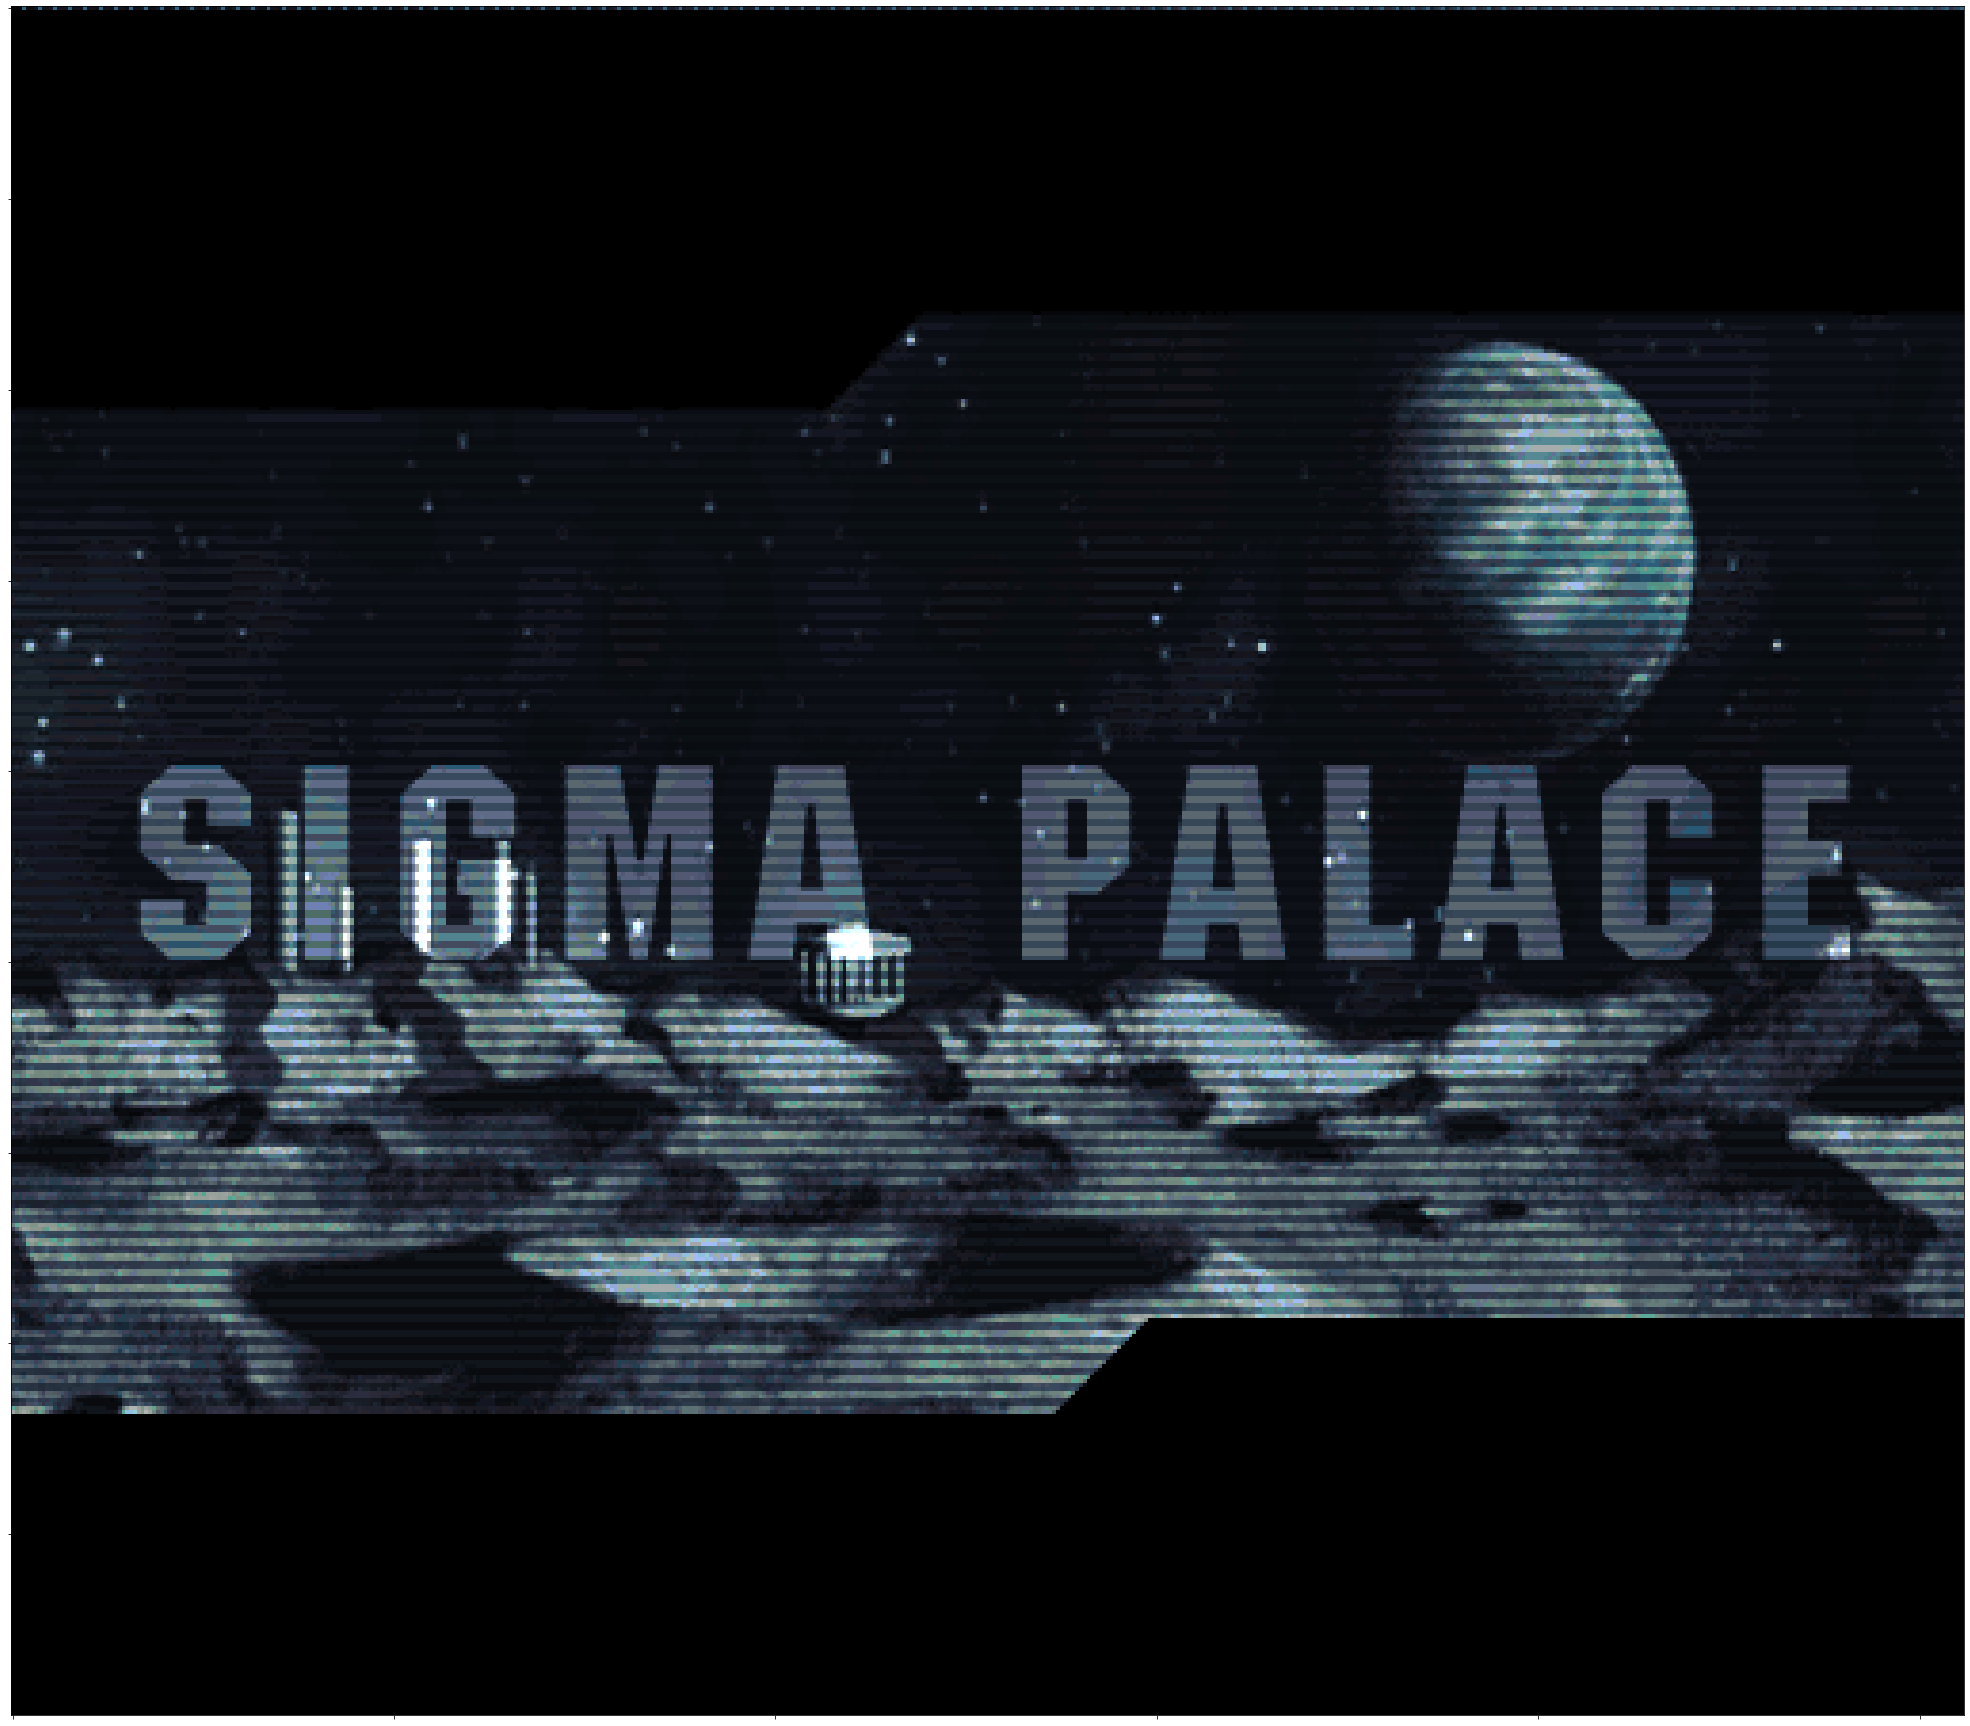

In [510]:
DEBUG = False

# for op_file in [
#                 pathlib.Path('textures/2D_LOAD_ELEVATOR.1E3EE6FB'), 
#                 pathlib.Path('textures/2D_LOAD_ONPARE.1E3EE6FB'), 
#                 pathlib.Path('textures/2D_LOAD_SIGMA.1E3EE6FB'), 
#                 pathlib.Path('textures/2D_LOAD_OP.1E3EE6FB'), 
#                 pathlib.Path('textures/intro.1E3EE6FB'), 
#                 pathlib.Path('textures/title.1E3EE6FB')]:

all_remains = []
failed_files = []
ran_out_of_bytes = []

D1 = 512

def printd(st, *args, **kwargs):
    if DEBUG:
        print(st, *args, **kwargs)

if DEBUG:
    # l = [pathlib.Path('textures/2D_LOAD_ELEVATOR - Copy.1E3EE6FB')]
    # l = [pathlib.Path('textures/cockpit.1E3EE6FB')]
    l = [pathlib.Path('textures/2D_LOAD_SIGMA.1E3EE6FB')]
else:
    l = tqdm(list(pathlib.Path('textures').glob('*.1E3EE6FB')))

for op_file in l:
    if op_file.stem == '2D_LOAD_SIGMA':
        DEBUG = True
    else:
        DEBUG = False
    try:
        file = open(op_file, 'rb')
    except PermissionError:
        file.close()
        printd('Cannot open due to permission')
        continue
    
    try:
        reader = FileStream(file)

        oop_header = reader.read_string(8)
        file_size = reader.read_int(4)
        unk1 = reader.read_byte_array(4)

        count = reader.read_int(4)
        printd(f'*********There are {count} files in {op_file} **********')

        offsets = []

        for _ in range(count):
            offset = reader.read_int(4)
            offsets.append(offset)
            # print(f"offset = {offset:X}")

        file_size_dupe = reader.read_int(4)

        all_n_images = {}
        for file_idx, offset in enumerate(offsets):
            reader.seek(offset)

            all_extra_ints = {}
            all_shapes = {}
            all_bpps = {}
            all_alt_w = {}
            all_alt_h = {}
            all_wpg_unk3 = {}
            
            wpg_header = reader.read_byte_array(16)
            wpg_temp = reader.read_string()

            wpg_magic1 = reader.read_byte_array(20)

            wpg_id = reader.read_string()

            wpg_magic2 = reader.read_byte_array(4)

            wpg_n_images = reader.read_int(4)
            all_n_images[offset] = wpg_n_images
            printd(f'>>> New offset {offset} with {wpg_n_images} at {reader.tell()}')

            wpg_unk1 = reader.read_byte_array(84)

            filler = 0
            for i in range(wpg_n_images):
                width = reader.read_int()
                height = reader.read_int()

                alt_w = reader.read_int()
                if alt_w == 0 or alt_w % 2 != 0 or alt_w > 512:
                    reader.seek(reader.tell()-2)
                    alt_w = reader.read_int(1)
                    reader.read_byte()
                alt_h = reader.read_int()
                if alt_h == 0 or alt_h % 2 != 0:
                    reader.seek(reader.tell()-2)
                    alt_h = reader.read_int(1)
                    reader.read_byte()

                wpg_unk2 = reader.read_int_array(4)

                bpp = reader.read_int()
                bpp_dupe = reader.read_int()

                if bpp == 8:
                    s1 = min(alt_w, width) if alt_w != 0 else width
                    s2 = min(alt_h, height) if alt_h != 0 else height

                    width = s1
                    height = s2

                wpg_unk3 = reader.read_int_array(12, 1)

                printd(f'\tw={width}, h={height}, altw={alt_w}, alth={alt_h}, unk2={wpg_unk2}, bpp={bpp}, bpp_dupe={bpp_dupe}, wpg_unk3={wpg_unk3}, tell={reader.tell()}')
                assert bpp == bpp_dupe

                all_shapes[i] = (width, height)
                all_bpps[i] = bpp
                all_alt_w[i] = alt_w
                all_alt_h[i] = alt_h
                all_wpg_unk3[i] = wpg_unk3

                filler += (width * height)+D1
                # if bpp == 16:
                #     filler += (width * height)+1001
                # else:
                #     filler += (width * height)+246
                # check = reader.tell()
                # wpg_unk2 = reader.read_int_array(14*2, size_bytes=1)
                # reader.seek(check)

                # wpg_unk2_p2 = reader.read_int_array(14)

                # for att_bpp in wpg_unk2_p2:
                #     if att_bpp == 8 or att_bpp == 16:
                #         all_bpps[offset] = att_bpp
                #         break

                # all_extra_ints[i] = wpg_unk2_p2
                # # wpg_unk2 = reader.read_byte_array(28)
                # printd(f'tell={reader.tell()}, offset={offset}, im={i}, w={width}, h={height}')
                # printd('\t[1b]', [f'{h:03}' for h in wpg_unk2])
                # printd('\t[2b]', [f'{h:03}' for h in wpg_unk2_p2])
                # printd('\t[1b_x]', [f'0x{h:02X}' for h in wpg_unk2])
                # printd('\t[2b_x]', [f'0x{h:02X}' for h in wpg_unk2_p2])
                # printd('\n')

            filler += 0

            if file_idx+1 < len(offsets):
                next_off = offsets[file_idx+1]
                dist_to_next = next_off - filler
                missing_dist = next_off - (reader.tell()+filler)
                printd(f'\tData starting at {reader.tell()} wants to end at {next_off}, with filler={filler} we get to {reader.tell()+filler} missing {missing_dist}')
                if missing_dist > 0:
                    reader.seek(reader.tell()+missing_dist)
            else:
                next_off = reader.total_bytes()
                dist_to_next = next_off - filler
                missing_dist = next_off - (reader.tell()+filler)
                printd(f'\tData starting at {reader.tell()} wants to end at {next_off}, with filler={filler} we get to {reader.tell()+filler} missing {missing_dist}')
                start_m = reader.tell()
                if missing_dist > 0:
                    reader.seek(reader.tell()+missing_dist)
            # reader.seek(reader.tell()+44)
            # reader.seek(reader.tell()-55)

            # if DEBUG:
            #     ncols = min(wpg_n_images, 3)
            #     nrows = max(1, round(wpg_n_images / ncols))
            #     fig, ax = plt.subplots(nrows, ncols, figsize=(15, 10))
            #     fig.suptitle(f'File {file_idx+1}/{count} at offset {offset}')
            #     print(nrows, ncols)

            # data_start_offset = reader.tell()

            # next_bpp = []
            # for key in all_bpps:
            #     next_bpp.append(all_bpps[key])
            # next_bpp = np.unique(next_bpp)
            # assert len(next_bpp)==1

            # next_bpp = next_bpp[0]
            # if next_bpp == 16:
            #     reader.seek(reader.tell()+32)
            # elif next_bpp == 8:
            #     reader.seek(reader.tell()-55)

            for i in range(wpg_n_images):
                bpp_mode = all_bpps[i]
                shape = all_shapes[i]

                # if bpp_mode == 16:
                #     reader.seek(reader.tell()+128)
                # elif bpp_mode == 8:
                #     reader.seek(reader.tell()+100)
                # else:
                #     printd('\tInvalid bpp before want')
                # if bpp_mode == 16:
                #     want = (shape[0]*shape[1])+1024
                # else:
                #     want = (shape[0]*shape[1])+256
                # bpp_mode = all_extra_ints[i][6]

                want = (shape[0]*shape[1])+D1
                printd(f'\tidx={i}, w={shape[0]}, h={shape[1]}, tell={reader.tell()}/{reader.total_bytes()}, want={want}, bpp={bpp_mode}')
                # if bpp_mode == 8:
                #     s1 = min(all_alt_w[i], shape[0]) if all_alt_w[i] != 0 else shape[0]
                #     s2 = min(all_alt_h[i], shape[1]) if all_alt_h[i] != 0 else shape[1]
                #     shape = (s1, s2)
                #     want = shape[0]*shape[1]
                #     printd(f'\tUsing shape {shape} with new want {want}')
                #     # want += 1024//all_alt_w[i]
                # elif bpp_mode == 16:
                #     # want += 1024//all_alt_w[i]
                #     want += 0
                # else:
                #     printd('\tInvalid bpp')

                checkpt = reader.tell()
                im_data = reader.read(want)
                if not im_data:
                    # print(f'Ran out of bytes')
                    ran_out_of_bytes.append(op_file)
                    break
                
                after = reader.tell()
                # im = Image.frombytes("P", shape, im_data, 'raw', 'P', 0, -1)
                im = Image.frombytes("P", shape, im_data, 'raw', 'P', 0, -1)

                if bpp == 16 or bpp == 8:
                    # ln = 1024 if missing_dist < 0 or missing_dist >= 1024 else missing_dist
                    ln = 1024
                    reader.seek(after-ln)
                    # reader.seek(checkpt-ln)
                    arr = reader.read_int_array(ln, size_bytes=1)
                    # printd(arr)
                    reader.seek(after)
                    # pal_mode = 'RGB'
                    # if pal_mode == 'RGB':
                    # else:
                    #     arr = reader.read_int_array(1024, size_bytes=1)
                    im.putpalette(arr, 'RGBX')
                im = im.convert('RGB')
                im.save(f'figures2/{op_file.stem}_{i}_{bpp}.png')
                # print(np.array(im).shape)
                # np.save('test.npy', np.array(im))
            
                if DEBUG:
                    # if type(ax) != np.ndarray:
                    #     curr = ax
                    # elif len(ax.shape) == 1:
                    #     curr = ax[i]
                    # else:
                    #     r = i // ncols
                    #     c = i % ncols
                    #     curr = ax[r][c]
                    fig, curr = plt.subplots(figsize=(35, 35))
                    curr.set_xticklabels([])
                    curr.set_yticklabels([])
                    curr.imshow(im)
                # curr.set_title(f'i={i+1}/{wpg_n_images}')
                # plt.tight_layout()
                # plt.savefig(f'figures/{i}.png')
            printd(f'\tFinished offset at {reader.tell()} of {reader.total_bytes()}')
        # print(f'Tell finished at {reader.tell()}/{reader.total_bytes()} so {reader.total_bytes()-reader.tell()} bytes remain')
        # print(all_shapes)
        # print(all_n_images)
        all_remains.append(reader.total_bytes()-reader.tell())

        file.close()
    except Exception as ex:
        failed_files.append(op_file)
        if DEBUG:
            ex.with_traceback()
        continue

print('Remains', np.unique(all_remains))
if len(failed_files) > 0:
    print('Failed', len(failed_files), failed_files)
if len(ran_out_of_bytes) > 0:
    print('Ran out of bytes', len(ran_out_of_bytes), ran_out_of_bytes)

# Remains [     0     76    140    172    204 165684]
# Failed 142
# Ran out of bytes 33